In [1]:
import pandas as pd 
import numpy as np
import jieba
microwave = pd.read_csv('./files/microwave1.csv',encoding='gb18030')
microwave = microwave[['star_rating','review']]
microwave.head()
#进行分词
mycut = lambda s: ' '.join(jieba.cut(s))
cut_review = microwave['review'].astype(str).apply(mycut)
review_1000 = cut_review[0:1000]
review_1000.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\16249\AppData\Local\Temp\jieba.cache
Loading model cost 0.836 seconds.
Prefix dict has been built succesfully.


0    Do   not   recommend   it .   go   use   your ...
1    Looks   as   good   as   the   picture   Didn ...
2    Four   Stars   Very   nice   microwave ,   gre...
3    quiet   Quiet ,   but   does   not   seem   li...
4    Four   Stars   It ' s   bigger   than   I   th...
Name: review, dtype: object

In [2]:
review_1000[[16,67,191,206,375,553,864,880,994]]

16     Love   to   nuke   Good   price ,   has   cont...
67     Not   very   happy   with   the   new   design...
191    Five   Stars   Looks   great   for   the   pri...
206    Five   Stars   Great   small   size ,   easy  ...
375    Five   Stars   Great   service ,   very   good...
553    I   feel   like   I   made   a   big   mistake...
864    Looks   great   but   longevity   poor   This ...
880    Perfect   for   my   RV .   Bought   this   cu...
994    Nice !   This   is   a   really   nice   littl...
Name: review, dtype: object

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
corpus = list(review_1000[::1])
# TF-IDF向量化工具
tfidf_vec = TfidfVectorizer() 
tfidf_matrix = tfidf_vec.fit_transform(corpus)
# 获取词汇表
# print(tfidf_vec.get_feature_names())
# 获取每个单词出现的次数
# print(tfidf_vec.vocabulary_)
# 获取文档的TF-IDF词向量
# print(tfidf_matrix.toarray())
# 计算各篇文档的相似度
cosine_similarity = cosine_similarity(tfidf_matrix)
cosine_similarity

array([[1.        , 0.16457743, 0.        , ..., 0.01922347, 0.06710329,
        0.10114364],
       [0.16457743, 1.        , 0.04159663, ..., 0.05184304, 0.12187703,
        0.12794563],
       [0.        , 0.04159663, 1.        , ..., 0.05446499, 0.        ,
        0.03934316],
       ...,
       [0.01922347, 0.05184304, 0.05446499, ..., 1.        , 0.03036484,
        0.05801254],
       [0.06710329, 0.12187703, 0.        , ..., 0.03036484, 1.        ,
        0.05626966],
       [0.10114364, 0.12794563, 0.03934316, ..., 0.05801254, 0.05626966,
        1.        ]])

In [4]:
#微波炉第特定条评论跟前74条评论的相似度 74-1month  1000-
df_cosine_similarity = pd.DataFrame(cosine_similarity[[16,67,191,206,375,553,864,880,994]])
df_cosine_similarity = df_cosine_similarity.iloc[:,0:1000]
df_cosine_similarity

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.118478,0.164819,0.061946,0.038014,0.009246,0.234187,0.128017,0.088380,0.235956,0.225100,...,0.214921,0.264222,0.125399,0.131978,0.182968,0.111172,0.126903,0.086004,0.061342,0.213506
1,0.120892,0.153054,0.047835,0.030267,0.008668,0.133809,0.113636,0.061504,0.213485,0.170396,...,0.207358,0.265396,0.145297,0.167770,0.158161,0.208108,0.089527,0.066344,0.058411,0.252322
2,0.151186,0.139777,0.248939,0.030600,0.061481,0.081551,0.035059,0.092587,0.063520,0.092840,...,0.057518,0.129639,0.138060,0.033302,0.064455,0.031430,0.076204,0.056922,0.053542,0.089234
3,0.000000,0.061009,0.273207,0.000000,0.067475,0.085291,0.087781,0.035354,0.032380,0.060359,...,0.005389,0.045178,0.037286,0.000000,0.118837,0.000000,0.000000,0.054046,0.009213,0.023207
4,0.022393,0.102075,0.389219,0.000000,0.056321,0.066809,0.019851,0.050548,0.031782,0.082802,...,0.011940,0.066750,0.035774,0.094334,0.035645,0.031942,0.111712,0.058650,0.019186,0.072176
5,0.119446,0.146715,0.000000,0.044374,0.111771,0.054532,0.078234,0.010910,0.053315,0.115264,...,0.085640,0.096102,0.041570,0.074890,0.080094,0.020803,0.087422,0.019415,0.074801,0.108927
6,0.065044,0.154919,0.036972,0.019449,0.009735,0.104321,0.076421,0.079656,0.180069,0.152375,...,0.235008,0.196930,0.084030,0.130392,0.138858,0.069417,0.082505,0.069766,0.070901,0.192037
7,0.046249,0.103113,0.086654,0.029841,0.000000,0.102885,0.064605,0.090821,0.084239,0.134059,...,0.167141,0.207025,0.120817,0.113049,0.078267,0.089170,0.076848,0.123451,0.028360,0.118135
8,0.066710,0.108884,0.133447,0.000000,0.020017,0.107635,0.150787,0.186586,0.144437,0.122145,...,0.099356,0.185880,0.176075,0.153536,1.000000,0.041906,0.047442,0.065270,0.042439,0.140577


In [5]:
#74-1month  1000-
list2 = []
for i in range(0,1000):
    max_num =max(df_cosine_similarity[i])
    j=0
    for each_num in df_cosine_similarity[i]:
        if max_num > 0.0:
            if each_num == max_num:
#                 print(each_num)
                list2.append(j)
            j = j+1
        else:
            list2.append(int(max_num))
            break
print(list2)

[2, 0, 4, 5, 5, 0, 8, 8, 0, 0, 2, 2, 6, 0, 1, 7, 0, 1, 4, 4, 4, 8, 7, 3, 0, 1, 3, 2, 7, 0, 2, 1, 4, 8, 0, 1, 3, 0, 7, 8, 3, 0, 8, 8, 5, 3, 7, 1, 3, 1, 0, 0, 0, 3, 8, 4, 0, 0, 0, 2, 4, 3, 8, 4, 1, 2, 0, 1, 6, 3, 2, 2, 0, 1, 6, 6, 1, 3, 0, 0, 0, 6, 0, 7, 2, 7, 6, 1, 0, 1, 0, 4, 4, 7, 6, 2, 4, 5, 3, 0, 0, 3, 4, 1, 3, 2, 0, 1, 0, 1, 8, 0, 0, 0, 6, 6, 1, 0, 1, 4, 1, 4, 2, 1, 2, 0, 5, 4, 8, 3, 0, 0, 1, 0, 1, 0, 6, 4, 6, 4, 2, 8, 8, 8, 3, 2, 7, 2, 4, 4, 2, 1, 3, 3, 2, 3, 2, 0, 4, 7, 8, 7, 1, 0, 7, 4, 3, 2, 0, 3, 4, 4, 2, 4, 4, 0, 3, 0, 7, 0, 0, 8, 0, 7, 0, 8, 4, 2, 2, 0, 3, 2, 3, 0, 0, 6, 0, 7, 1, 2, 3, 6, 0, 7, 4, 1, 3, 4, 2, 3, 7, 6, 8, 6, 3, 4, 3, 3, 3, 0, 0, 2, 0, 3, 0, 8, 4, 0, 0, 2, 1, 0, 1, 6, 3, 4, 2, 0, 8, 4, 0, 4, 2, 1, 2, 7, 0, 5, 8, 0, 0, 3, 3, 1, 0, 2, 0, 2, 2, 1, 0, 0, 7, 4, 4, 3, 1, 3, 1, 2, 3, 1, 4, 2, 3, 2, 8, 4, 2, 4, 8, 2, 3, 4, 1, 2, 0, 3, 3, 6, 0, 0, 0, 0, 1, 2, 7, 1, 3, 2, 7, 4, 8, 8, 0, 8, 2, 0, 0, 0, 3, 8, 5, 4, 1, 4, 5, 6, 1, 0, 4, 6, 1, 3, 1, 0, 4, 7, 3, 4, 0, 5, 1, 

In [6]:
review_kind2 = []
for j in list2:
    if j == 0:
        review_kind2.append(18)
    elif j == 1:
        review_kind2.append(76)
    elif j == 2:
        review_kind2.append(216)
    elif j == 3:
        review_kind2.append(232)
    elif j == 4:
        review_kind2.append(430)
    elif j == 5:
        review_kind2.append(637)
    elif j == 6:
        review_kind2.append(1090)
    elif j == 7:
        review_kind2.append(1122)
    else:
        review_kind2.append(1315)
print(review_kind2)

[216, 18, 430, 637, 637, 18, 1315, 1315, 18, 18, 216, 216, 1090, 18, 76, 1122, 18, 76, 430, 430, 430, 1315, 1122, 232, 18, 76, 232, 216, 1122, 18, 216, 76, 430, 1315, 18, 76, 232, 18, 1122, 1315, 232, 18, 1315, 1315, 637, 232, 1122, 76, 232, 76, 18, 18, 18, 232, 1315, 430, 18, 18, 18, 216, 430, 232, 1315, 430, 76, 216, 18, 76, 1090, 232, 216, 216, 18, 76, 1090, 1090, 76, 232, 18, 18, 18, 1090, 18, 1122, 216, 1122, 1090, 76, 18, 76, 18, 430, 430, 1122, 1090, 216, 430, 637, 232, 18, 18, 232, 430, 76, 232, 216, 18, 76, 18, 76, 1315, 18, 18, 18, 1090, 1090, 76, 18, 76, 430, 76, 430, 216, 76, 216, 18, 637, 430, 1315, 232, 18, 18, 76, 18, 76, 18, 1090, 430, 1090, 430, 216, 1315, 1315, 1315, 232, 216, 1122, 216, 430, 430, 216, 76, 232, 232, 216, 232, 216, 18, 430, 1122, 1315, 1122, 76, 18, 1122, 430, 232, 216, 18, 232, 430, 430, 216, 430, 430, 18, 232, 18, 1122, 18, 18, 1315, 18, 1122, 18, 1315, 430, 216, 216, 18, 232, 216, 232, 18, 18, 1090, 18, 1122, 76, 216, 232, 1090, 18, 1122, 430, 76, 2

In [7]:
review_score2 = []
for j in list2:
    if j == 0:
        review_score2.append(4)
    elif j == 1:
        review_score2.append(-4)
    elif j == 2:
        review_score2.append(3)
    elif j == 3:
        review_score2.append(2)
    elif j == 4:
        review_score2.append(4)
    elif j == 5:
        review_score2.append(-4)
    elif j == 6:
        review_score2.append(-2)
    elif j == 7:
        review_score2.append(4)
    else:
        review_score2.append(2)
print(review_score2)

[3, 4, 4, -4, -4, 4, 2, 2, 4, 4, 3, 3, -2, 4, -4, 4, 4, -4, 4, 4, 4, 2, 4, 2, 4, -4, 2, 3, 4, 4, 3, -4, 4, 2, 4, -4, 2, 4, 4, 2, 2, 4, 2, 2, -4, 2, 4, -4, 2, -4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 3, 4, 2, 2, 4, -4, 3, 4, -4, -2, 2, 3, 3, 4, -4, -2, -2, -4, 2, 4, 4, 4, -2, 4, 4, 3, 4, -2, -4, 4, -4, 4, 4, 4, 4, -2, 3, 4, -4, 2, 4, 4, 2, 4, -4, 2, 3, 4, -4, 4, -4, 2, 4, 4, 4, -2, -2, -4, 4, -4, 4, -4, 4, 3, -4, 3, 4, -4, 4, 2, 2, 4, 4, -4, 4, -4, 4, -2, 4, -2, 4, 3, 2, 2, 2, 2, 3, 4, 3, 4, 4, 3, -4, 2, 2, 3, 2, 3, 4, 4, 4, 2, 4, -4, 4, 4, 4, 2, 3, 4, 2, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 3, 3, 4, 2, 3, 2, 4, 4, -2, 4, 4, -4, 3, 2, -2, 4, 4, 4, -4, 2, 4, 3, 2, 4, -2, 2, -2, 2, 4, 2, 2, 2, 4, 4, 3, 4, 2, 4, 2, 4, 4, 4, 3, -4, 4, -4, -2, 2, 4, 3, 4, 2, 4, 4, 4, 3, -4, 3, 4, 4, -4, 2, 4, 4, 2, 2, -4, 4, 3, 4, 3, 3, -4, 4, 4, 4, 4, 4, 2, -4, 2, -4, 3, 2, -4, 4, 3, 2, 3, 2, 4, 3, 4, 2, 3, 2, 4, -4, 3, 4, 2, 2, -2, 4, 4, 4, 4, -4, 3, 4, -4, 2, 3, 4, 4, 2, 2, 4, 2, 3, 4, 4, 4, 2, 2, -4,

In [9]:
#74-1month  1000-546days
microwave100_kind = microwave[0:1000]
microwave100_kind['review_kind'] = review_kind2
microwave100_kind['review_score'] = review_score2
# microwave100_kind.to_csv('microwave100_kind.csv')
microwave100_kind.head()

d:\python3.6.4\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\python3.6.4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,star_rating,review,review_kind,review_score
0,1,Do not recommend it. go use your money for som...,216,3
1,5,Looks as good as the picture Didn't use it lon...,18,4
2,4,"Four Stars Very nice microwave, great price",430,4
3,3,"quiet Quiet, but does not seem like 1000 watt ...",637,-4
4,4,Four Stars It's bigger than I thought.,637,-4


# EWMA

In [12]:
import matplotlib.pyplot as plt
microwave1 = pd.read_csv('./files/microwave.csv',encoding='gb18030')
microwave100_kind['review_date'] = microwave1['review_date']
sum_score = microwave100_kind.groupby('review_date').sum()[['star_rating','review_score']]
sum_score['date'] = pd.to_datetime(sum_score.index).values
sum_score.set_index('date',inplace=True)
sum_score.sort_index(inplace=True)
total_score = sum_score['star_rating'] * 0.3 + sum_score['review_score'] * 0.7
sum_score['total_score'] = total_score
sum_score.head()

d:\python3.6.4\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,star_rating,review_score,total_score
date,,,
2012-11-16,5,-4,-1.3
2012-11-17,1,-4,-2.5
2012-11-26,5,4,4.3
2012-11-27,4,4,4.0
2012-12-07,5,-4,-1.3


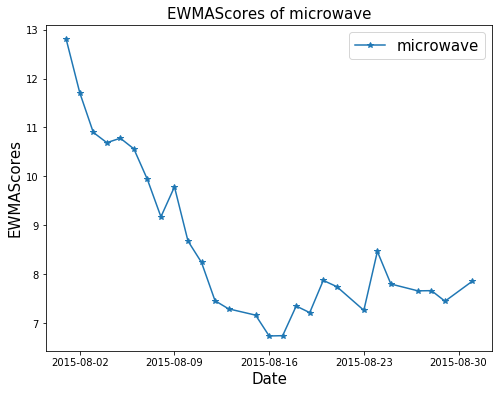

In [14]:
sum_score = sum_score.loc['2015-08-01':'2015-08-31']
def EWMA(scores, alpha=0.9):
    newScores = np.zeros(shape = scores.shape)
    newScores[0] = scores[0]
    for i in range(1, len(scores)):
        newScores[i] = scores[i]*alpha + newScores[i-1]*(1-alpha)
    return newScores;
import pandas as pd 
scores = sum_score['total_score']
newScores = EWMA(scores, alpha=0.1)
sum_score['EWMAstar_rating'] = newScores
# print(sum_score.head())
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(sum_score.index,sum_score['EWMAstar_rating'],marker='*')
plt.xlabel('Date',fontsize=15)
plt.ylabel('EWMAScores',fontsize=15)
plt.title('EWMAScores of microwave',fontsize=15)
plt.legend(['microwave'],fontsize=15)

In [17]:
ave_score = microwave100_kind.groupby('review_date').mean()[['star_rating','review_score']]
ave_score['date'] = pd.to_datetime(ave_score.index).values
ave_score.set_index('date',inplace=True)
ave_score.sort_index(inplace=True)
ave_total_score = ave_score['star_rating'] * 0.3 + ave_score['review_score'] * 0.7
ave_score['ave_total_score'] = ave_total_score
ave_score.head()

,star_rating,review_score,ave_total_score
date,,,
2012-11-16,5.0,-4.0,-1.3
2012-11-17,1.0,-4.0,-2.5
2012-11-26,5.0,4.0,4.3
2012-11-27,4.0,4.0,4.0
2012-12-07,5.0,-4.0,-1.3


            star_rating  review_score  ave_total_score  EWMAstar_rating
date                                                                   
2015-08-01     4.800000      1.600000         2.560000         4.800000
2015-08-02     3.666667     -0.666667         0.633333         4.686667
2015-08-03     5.000000      3.000000         3.600000         4.718000
2015-08-04     5.000000      1.000000         2.200000         4.746200
2015-08-05     4.333333      3.666667         3.866667         4.704913


d:\python3.6.4\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


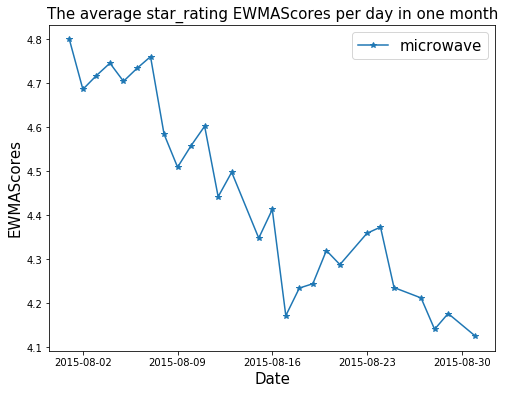

In [18]:
ave_score2 = ave_score.loc['2015-08-01':'2015-08-31']
# plt.plot(ave_score2.index,ave_score2['star_rating'],marker='*')
# 加权指数平均，当天的权值为0.9，前一天的权值为(1-0.9)*0.9
# 当天得分 EWMAtoday=α * score + ( 1 - α ) * EMAyesterday
def EWMA(scores, alpha=0.9):
    # 初始化移动加权平均后的数组
    newScores = np.zeros(shape = scores.shape)
    # 因为第一天前面没有数据，没法加权平均
    newScores[0] = scores[0]
    # 从第二天开始朝后，开始进行加权平均
    for i in range(1, len(scores)):
        # 当天最终的得分 等于 今天分值乘以当天权值 + 昨天最终得分 * （1-当天权值）
        # 注意这儿用的是昨天的最终得分，昨天的最终得分也是通过EWMA计算而来，起到递归的效果
        newScores[i] = scores[i]*alpha + newScores[i-1]*(1-alpha)
    return newScores;
# 测试数据
# scores = np.array([2,3,4])
# 第一天是2分 第二天得分 s2 = 3*alpha + s1
# newScores = EWMA(scores, alpha=0.5)
import pandas as pd 
scores = np.array(ave_score2['star_rating'])
newScores = EWMA(scores, alpha=0.1)
ave_score2['EWMAstar_rating'] = newScores
print(ave_score2.head())
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(ave_score2.index,ave_score2['EWMAstar_rating'],marker='*')
plt.xlabel('Date',fontsize=15)
plt.ylabel('EWMAScores',fontsize=15)
plt.title('The average star_rating EWMAScores per day in one month',fontsize=15)
plt.legend(['microwave'],fontsize=15)

# 用平均累加求和代入logistics函数求概率值判断是否潜在成功

In [19]:
cumsum = 0
for i in range(0,26):
    cumsum1 = sum_score['total_score'][i+1] - sum_score['total_score'][i]
    cumsum = cumsum + cumsum1
#     print(cumsum1)
print('cumsum=',cumsum)
# Logistic函数，输出0-1内的数，映射成概率值
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))
print('微波炉概率值为',sigmoid(cumsum/26))

cumsum= -1.2999999999999998
微波炉概率值为 0.4875026035157896


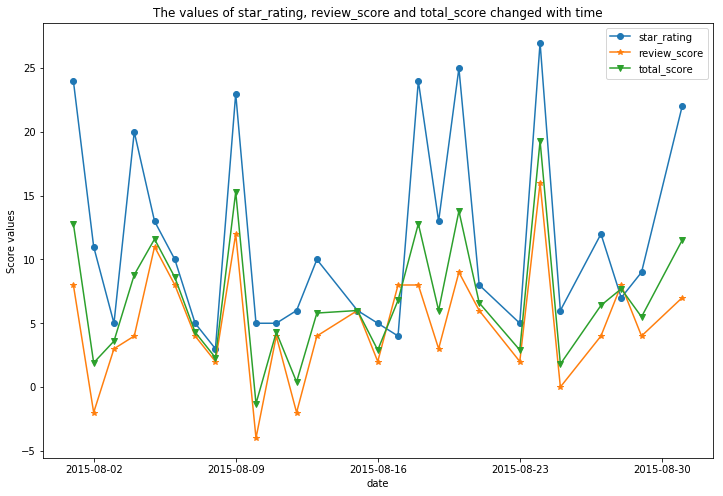

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sum_score.index,sum_score['star_rating'],marker='o')
plt.plot(sum_score.index,sum_score['review_score'],marker='*')
plt.plot(sum_score.index,sum_score['total_score'],marker='v')
plt.title("The values of star_rating, review_score and total_score changed with time")
plt.xlabel('date')
plt.ylabel('Score values')
#设置图例显示的位置和列的个数
plt.legend(['star_rating','review_score','total_score'])
# ax.set_xticks(sum_score.index.values)
# ax.set_xticklabels(sum_score.index.values,rotation=40)
plt.show()